Notebook to plot the LrLx plane for all the sources together. This is used to generate Figures 4-6 in the paper. 

In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Bahramian Sample

In [3]:
# Get Bahramian data
# This is just the detections
lr_all, lx_all, source_classes = get_bahramian_data()
print(len(lr_all))
print(len(lx_all))

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.
402
402


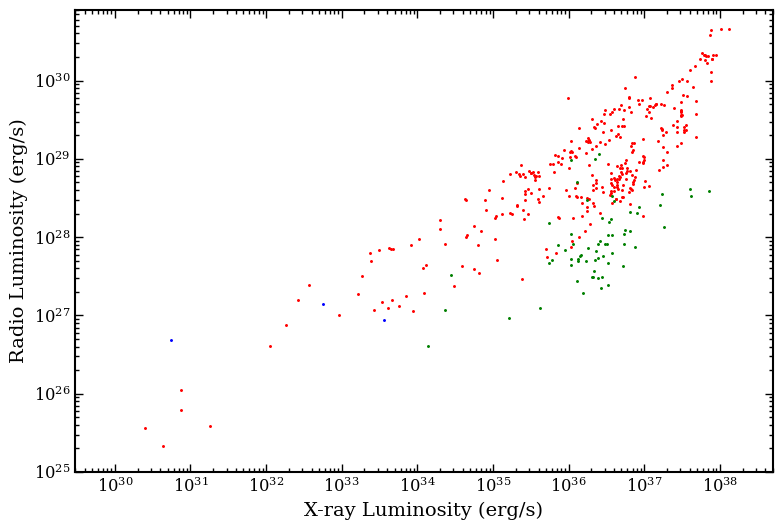

In [4]:
fig= plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
colours = ["red", "blue", "green", "purple"]
for i, cls in enumerate(["BH", "candidateBH", "NS", "candidateNS"]):
    mask_bah = (source_classes == cls) 
    plt.scatter(lx_all[mask_bah], lr_all[mask_bah], color=colours[i], s=5, marker=".")
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
plt.xlabel("X-ray Luminosity (erg/s)", fontsize=14)
plt.ylabel("Radio Luminosity (erg/s)", fontsize=14)
plt.xlim([3e29,5e38])
plt.ylim([1e25,8e30])
plt.show()

In [5]:
# Bahramian

print(f"Radio luminosity (Lr) range: {np.min(lr_all)} - {np.max(lr_all)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(lx_all)} - {np.max(lx_all)} erg/s")

Radio luminosity (Lr) range: 2.1248e+25 - 4.5823999999999996e+30 erg/s
X-ray luminosity (Lx) range: 2.5e+30 - 1.32e+38 erg/s


# Pairing

In [6]:
all_data_paired = get_all_LrLx_data(names = None, interp=False, rerun = True, save=True)

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']


In [7]:
## Luminosity range

df = all_data_paired

Lx = df["Lx"].to_numpy()
Lr= df["Lr"].to_numpy()

print(f"Radio luminosity (Lr) range: {np.min(Lr)} - {np.max(Lr)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(Lx)} - {np.max(Lx)} erg/s")


## Number of sources 
unique_names = df["name"].unique()
n_names = len(unique_names)
print("Sources: ", unique_names)
print("Number of sources: ", n_names)


## Number of BH and BH candidates
mask = df["class"].isin(["BH", "candidateBH"])
unique_names = df[mask]["name"].unique()
n_names = len(unique_names)
#print("BH and BH candidates: ", unique_names)
print("Number of BH and BH candidates: ", n_names)


## Number of sources actually used on the HS/QS plane
filtered_df = df[df["state"].isin(["HS", "QS"])]
unique_names = filtered_df["name"].unique()
n_names = len(unique_names)
#print("Sources: ", unique_names)
print("Number of sources used for the HS/QS plane: ", n_names)


## Number of BH and BH candidates used on the HS/QS plane
mask = filtered_df["class"].isin(["BH", "candidateBH"])
unique_names = filtered_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of BH and BH candidates used for the HS/QS plane: ", n_names)


## Number of paired data points
n_data = len(df)
print(f"Number of paired LrLx data points: {n_data}")


## Number of paired HS/QS data points
n_data = len(df[df["state"].isin(["HS", "QS"])])
print(f"Number of paired HS & QS LrLx data points: {n_data}")


Radio luminosity (Lr) range: 6.9101042666172875e+25 - 9.436096840227369e+30 erg/s
X-ray luminosity (Lx) range: 1.1584493888671988e+32 - 8.657182945483147e+38 erg/s
Sources:  ['1A 1744-361' '4U 1543-47' '4U 1630-47' 'Cen X-4' 'EXO 1846-031'
 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630'
 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1807+132' 'MAXI J1810-222'
 'MAXI J1816-195' 'MAXI J1820+070' 'SAX J1808.4-3658' 'SAX J1810.8-2609'
 'Swift J1727.8-1613' 'Swift J1842.5-1124' 'Vela X-1' 'XTE J1701-462']
Number of sources:  22
Number of BH and BH candidates:  14
Number of sources used for the HS/QS plane:  18
Number of BH and BH candidates used for the HS/QS plane:  12
Number of paired LrLx data points: 285
Number of paired HS & QS LrLx data points: 180


In [8]:
df.head()[["Fr", "Fr_unc", "t_diff", "Fr_uplim_bool"]]

,Fr,Fr_unc,t_diff,Fr_uplim_bool
0,1.240,0.064846,0.76522,False
1,0.087,0.018518,0.20989,False
2,0.081,0.027000,0.13873,True
3,0.093,0.031000,0.71769,True
4,0.051,0.017000,0.54753,True


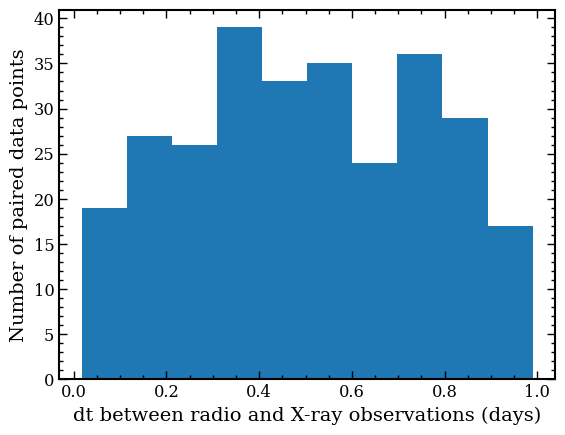

Mean dt: 0.5049052975572985 days


In [9]:
t_diff = df["t_diff"].to_numpy()
plt.hist(t_diff)
plt.xlabel("dt between radio and X-ray observations (days)", fontsize=14)
plt.ylabel("Number of paired data points", fontsize=14)
plt.show()
print(f"Mean dt: {np.mean(t_diff)} days")

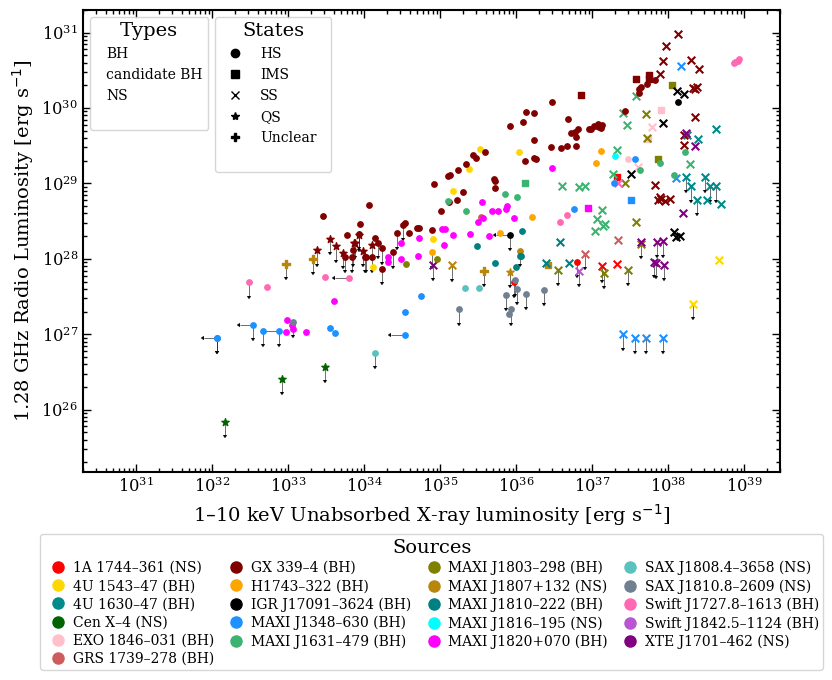

In [17]:
plot_Lr_Lx_plot1(all_data_paired)

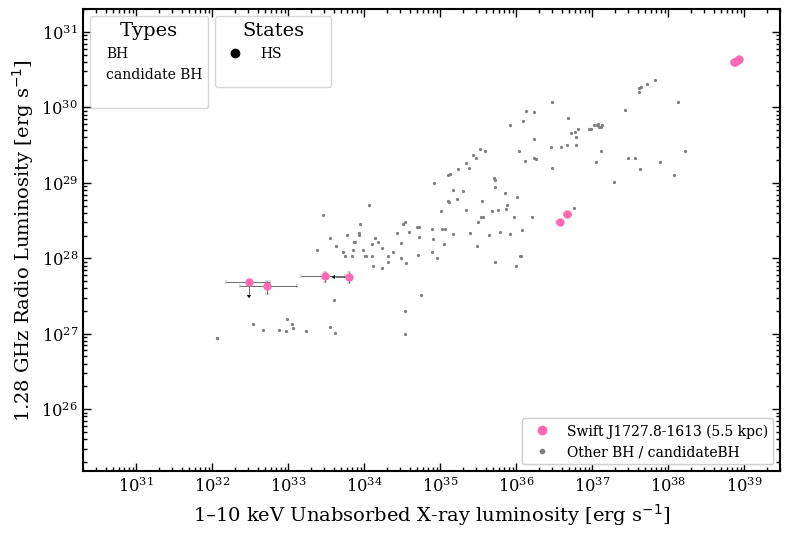

In [18]:
plot_Lr_Lx_plot3(all_data_paired, source_name= "Swift J1727.8-1613")

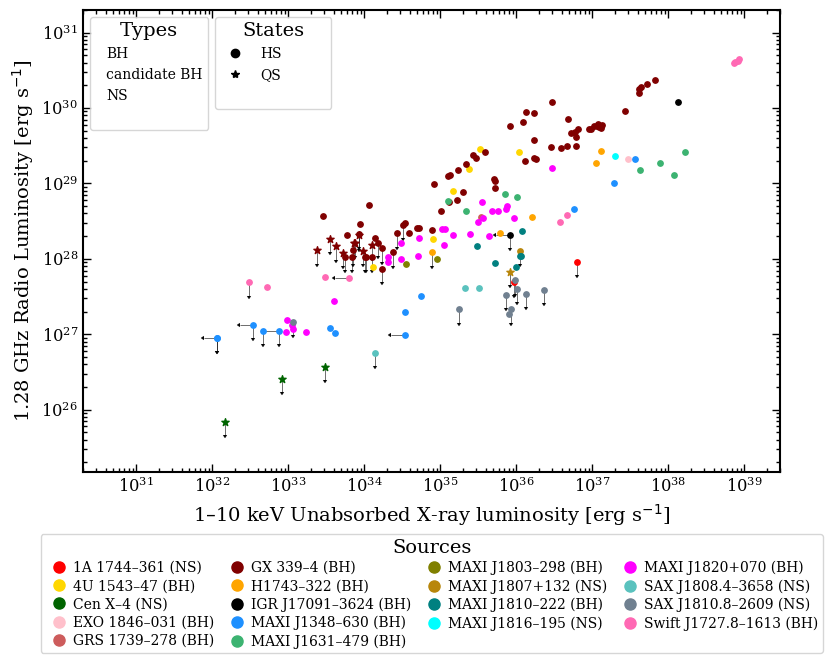

In [19]:
plot_Lr_Lx_plot1(all_data_paired, states=["HS", "QS"])

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


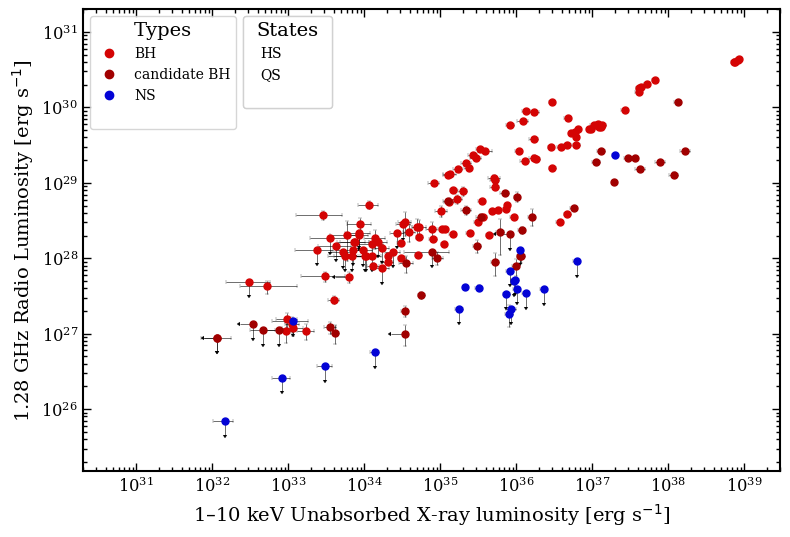

In [20]:
plot_Lr_Lx_plot2(all_data_paired, show_bahramian=False)

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


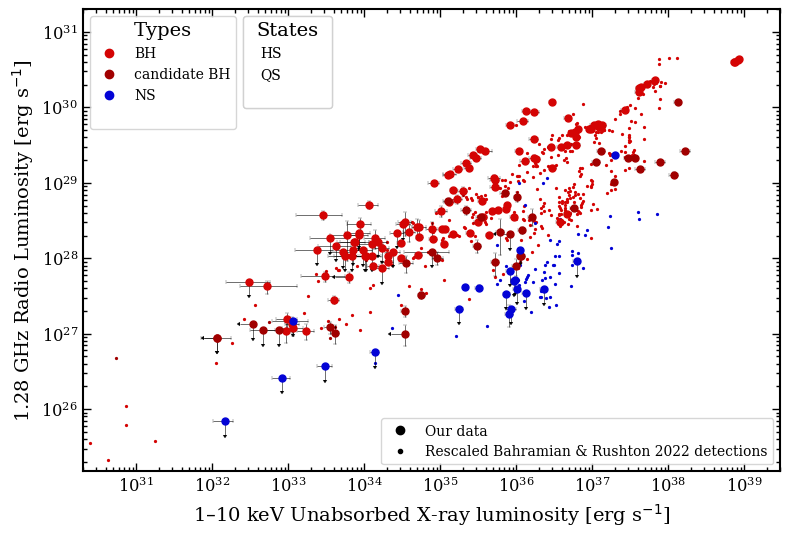

In [21]:
plot_Lr_Lx_plot2(all_data_paired, show_bahramian=True)

# Interpolating

In [2]:
all_data_interp = get_all_LrLx_data(names = None, interp=True, rerun = False, save=True)

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']


In [3]:
## Luminosity range

df = all_data_interp

Lx = df["Lx"].to_numpy()
Lr= df["Lr"].to_numpy()

print(f"Radio luminosity (Lr) range: {np.min(Lr)} - {np.max(Lr)} erg/s")
print(f"X-ray luminosity (Lx) range: {np.min(Lx)} - {np.max(Lx)} erg/s")


## Number of sources 
unique_names = df["name"].unique()
n_names = len(unique_names)
print("Sources: ", unique_names)
print("Number of sources: ", n_names)


## Number of BH and BH candidates
mask = df["class"].isin(["BH", "candidateBH"])
unique_names = df[mask]["name"].unique()
n_names = len(unique_names)
#print("BH and BH candidates: ", unique_names)
print("Number of BH and BH candidates: ", n_names)


## Number of sources actually used on the HS/QS plane
filtered_df = df[df["state"].isin(["HS", "QS"])]
unique_names = filtered_df["name"].unique()
n_names = len(unique_names)
#print("Sources: ", unique_names)
print("Number of sources used for the HS/QS plane: ", n_names)


## Number of BH and BH candidates used on the HS/QS plane
mask = filtered_df["class"].isin(["BH", "candidateBH"])
unique_names = filtered_df[mask]["name"].unique()
n_names = len(unique_names)
print("Number of BH and BH candidates used for the HS/QS plane: ", n_names)


## Number of paired data points
n_data = len(df)
print(f"Number of interpolated LrLx data points: {n_data}")


## Number of paired HS/QS data points
n_data = len(df[df["state"].isin(["HS", "QS"])])
print(f"Number of interpolated HS & QS LrLx data points: {n_data}")


Radio luminosity (Lr) range: 6.910104266617288e+25 - 9.436096840227368e+30 erg/s
X-ray luminosity (Lx) range: 1.2052876331658623e+32 - 8.571969615422546e+38 erg/s
Sources:  ['1A 1744-361' '4U 1543-47' '4U 1630-47' 'Cen X-4' 'EXO 1846-031'
 'GRS 1739-278' 'GX 339-4' 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630'
 'MAXI J1631-479' 'MAXI J1803-298' 'MAXI J1807+132' 'MAXI J1810-222'
 'MAXI J1816-195' 'MAXI J1820+070' 'SAX J1808.4-3658' 'SAX J1810.8-2609'
 'Swift J1727.8-1613' 'Swift J1842.5-1124' 'Vela X-1' 'XTE J1701-462']
Number of sources:  22
Number of BH and BH candidates:  14
Number of sources used for the HS/QS plane:  20
Number of BH and BH candidates used for the HS/QS plane:  14
Number of interpolated LrLx data points: 437
Number of interpolated HS & QS LrLx data points: 275


In [7]:

## IMPORTS
import numpy as np
import ast
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 1000)
from io import StringIO
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from IPython.display import HTML
import itertools
import os
import plotly.graph_objects as go
from astropy.time import Time
import matplotlib.dates as mdates
from matplotlib.patches import Polygon
from decimal import Decimal, ROUND_FLOOR, ROUND_CEILING
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
import matplotlib.pyplot as plt


import sys
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *




## PLOT FORMATTING
plt.rcParams['axes.formatter.useoffset'] = False  # Disable offset mode
plt.rcParams['axes.formatter.use_locale'] = False  # Locale settings can also influence formatting, but this line is optional.
plt.rcParams['axes.formatter.limits'] = (-5, 5)   # Range outside which scientific notation is used; set high to avoid sci-notation.
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 6.0
mpl.rcParams['ytick.minor.size'] = 3.0
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.major.size'] = 6.0
mpl.rcParams['xtick.minor.size'] = 3.0
mpl.rcParams['axes.linewidth'] = 1.5


def plot_Lr_Lx_plot1(paired_data, states=["HS", "IMS", "SS", "QS", "Unclear"], types=["BH", "candidateBH", "NS"], show_error_bars=False, save_name=None):

    mask = paired_data["state"].isin(states) & paired_data["class"].isin(types)

    paired_data_filtered = paired_data[mask].copy()

    x = paired_data_filtered["Lx"]
    xerr =[paired_data_filtered["Lx_unc_l"].copy(), paired_data_filtered["Lx_unc_u"].copy()] # x-axis errors
    y = paired_data_filtered["Lr"]
    yerr = paired_data_filtered["Lr_unc"].copy() # y-axis errors

    # Boolean arrays to specify directional limits for each data point
    uplims = paired_data_filtered["Fr_uplim_bool"]    # Upper y-limit arrow (down)
    xuplims = paired_data_filtered["Fx_uplim_bool"]  # Right x-limit arrow (down)

    if show_error_bars==False:
        xerr[0][~xuplims] = np.nan
        xerr[1][~xuplims] = np.nan
        yerr[~uplims] = np.nan

    
    unique_names = paired_data_filtered["name"].unique() 
    # Get the indices corresponding to unique names
    n_names = len(unique_names)
    # Get the source classes for the unique names
    source_classes = [paired_data_filtered[paired_data_filtered["name"] == name]["class"].iloc[0] for name in unique_names]

    fig= plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)

    plot, caps, bars = plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='.', ms=0.05, mec='blue', mfc='blue', uplims=uplims,  xuplims=xuplims, capsize=0.5, ecolor="black", elinewidth=0.4)
    for cap in caps:
        cap.set_color('black')      # Set cap color
        cap.set_markeredgewidth(0.2)  # Set edge width
        cap.set_markersize(3) 
    for bar in bars:
        bar.set_color('black')


    # Loop over classes and names
    for state in paired_data_filtered["state"].unique():
    
        data = paired_data_filtered[paired_data_filtered["state"] == state]
        marker = state_markers.get(state, '.')
        size = state_markersizes_extra_large.get(state, 3)
        
        for name in data["name"].unique():
            subset = data[data["name"] == name]
            if subset.empty: continue
            c = colours.get(name, 'black')
            cls = subset["class"].iloc[0]
            
            ax.scatter(
                subset["Lx"], subset["Lr"],
                label=f"{name} ({cls})",
                marker=marker,
                s=size,
                color=c, zorder=3
            )

    # Create source type legend
    types = ["candidate BH" if typ == "candidateBH" else typ for typ in types]
    type_legend_handles = [plt.Line2D([0], [0], color='none', linestyle='None', markersize=1, marker=".",  label=typ) for typ in types]
    phantom = plt.Line2D([0], [0], color='none', label='\u200A' * 65) 
    type_legend_handles.append(phantom)
    type_legend = ax.legend(handles=type_legend_handles, loc="upper left", title="Types", handlelength=0, fontsize=10)
    ax.add_artist(type_legend)



    # Create state legend (within plot) in black
    markers = [state_markers.get(state, '.') for state in states]
    state_legend_handles = [plt.Line2D([0], [0], marker=marker, color='black', linestyle='None', markersize=6, label=state) for state, marker in zip(states,markers)] 
    phantom = plt.Line2D([0], [0], color='none', label='\u200A' * 48)  
    state_legend_handles.append(phantom)
    state_legend = ax.legend(handles=state_legend_handles, loc="upper left",bbox_to_anchor=(0.18, 1.0), title="States", fontsize=10)
    ax.add_artist(state_legend)  

    
    # For the names array, replace "-" with "–"
    names_text = unique_names.copy()
    names_text = [name.replace("-", "–") for name in unique_names]
    # For the source_class array, replace "candidateBH" with "BH"
    source_classes = ["BH" if sc == "candidateBH" else sc for sc in source_classes]


    # Create source legend (at bottom) with dots
    source_legend_handles = [plt.Line2D([0], [0], marker='o', color=colours.get(name, 'black'), linestyle='None', markersize=8, label=f"{name_text} ({source_class})") for (name, name_text, source_class) in zip(unique_names, names_text, source_classes)] 
    ncol=4
    leg = plt.legend(loc="upper center", handles=source_legend_handles, bbox_to_anchor=(0.45, -0.12), ncol=ncol, title="Sources", fontsize=10,columnspacing=0.6,handletextpad=0.05,labelspacing=0.3,borderpad=0.3)

    plt.xlim([min_Lx,max_Lx])
    plt.ylim([min_Lr,max_Lr_2])

    plt.xlabel(r'1–10 keV Unabsorbed X-ray luminosity [erg s$^{-1}$]')
    plt.ylabel(r'1.28 GHz Radio Luminosity [erg s$^{-1}$]')
    ax.set_yscale("log", base=10)
    ax.set_xscale("log", base=10)
    ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=10))
    ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs="auto", numticks=10))


    if save_name!=None: 
        plt.savefig(f"../FIGURES/{save_name}.png", dpi=600, bbox_inches="tight", bbox_extra_artists=[leg])
        plt.savefig(f"../FIGURES/{save_name}.pdf", dpi=600, bbox_inches="tight", bbox_extra_artists=[leg])

    plt.show()




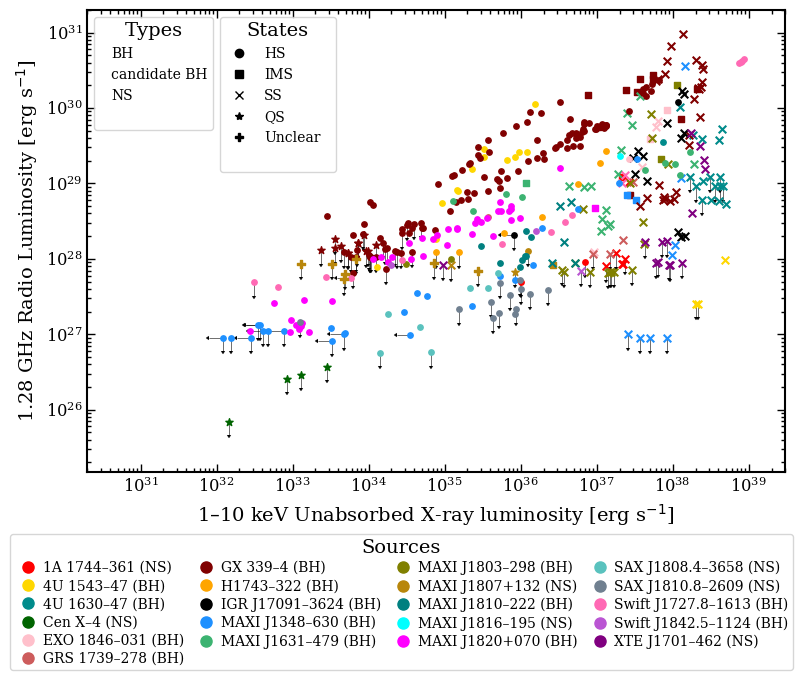

In [8]:
plot_Lr_Lx_plot1(all_data_interp, save_name="LrLx_plane_interp_sources")

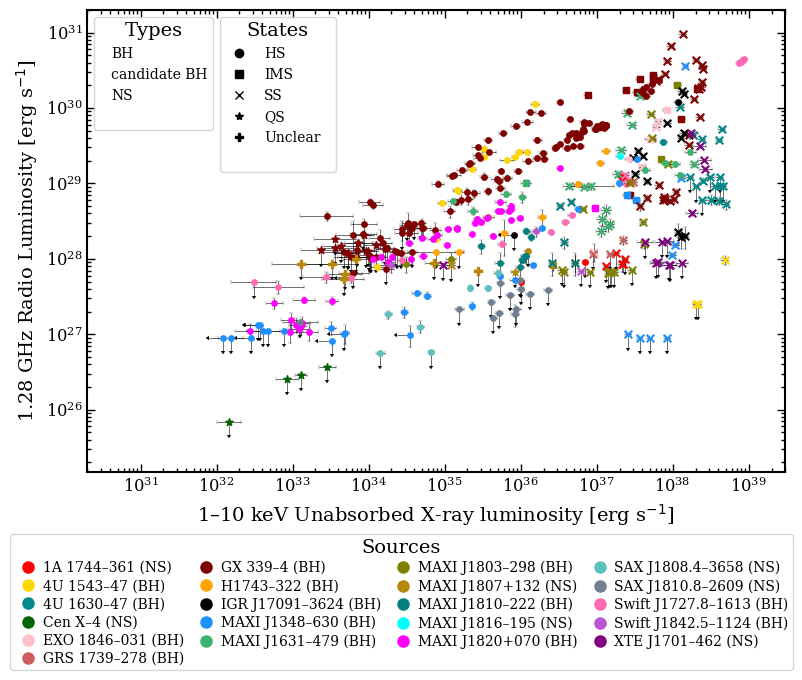

In [9]:
plot_Lr_Lx_plot1(all_data_interp, show_error_bars=True, save_name="LrLx_plane_interp_sources_with_errors")

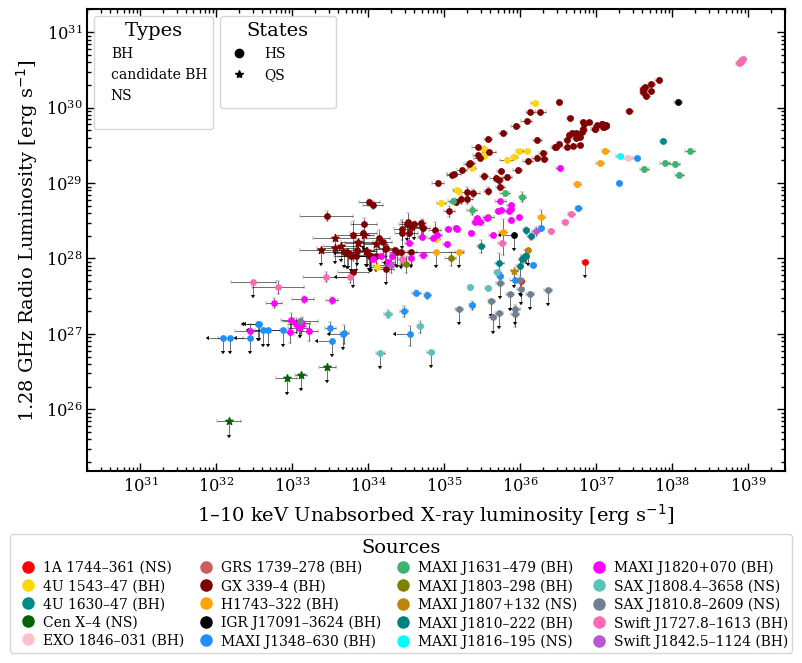

In [10]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], show_error_bars=True, save_name="LrLx_plane_interp_sources_with_errors_HS_QS")

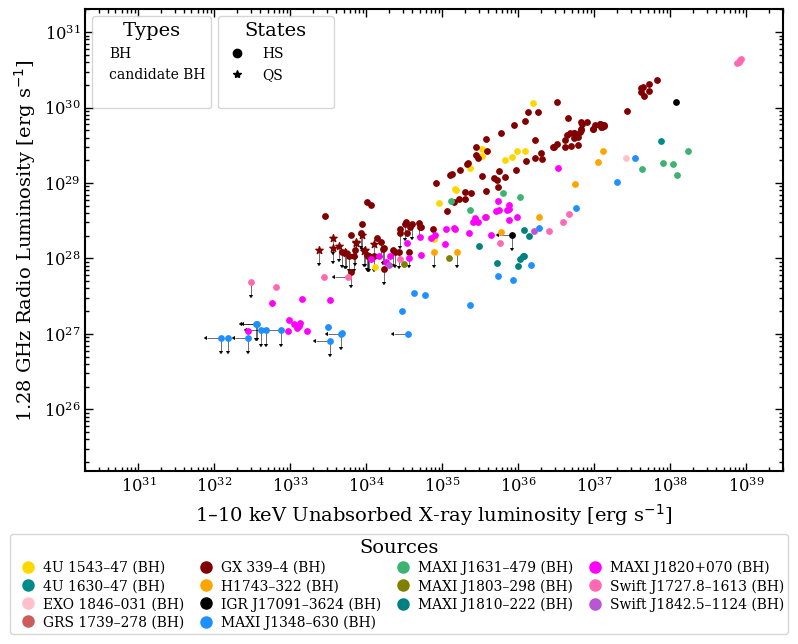

In [12]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["BH", "candidateBH"])

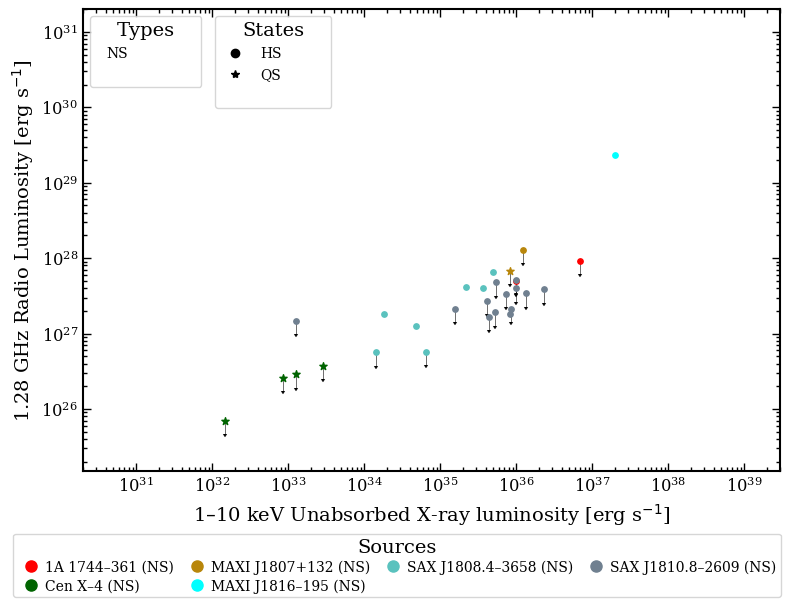

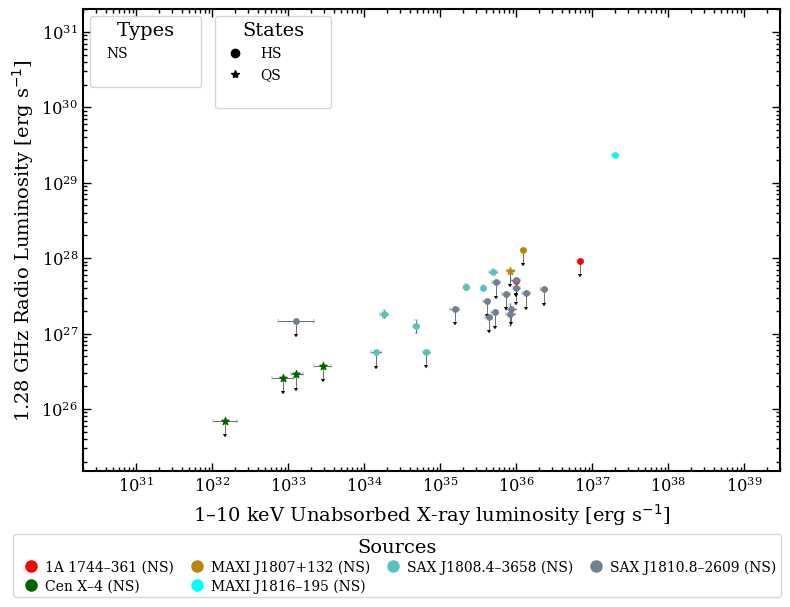

In [13]:
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["NS"])
plot_Lr_Lx_plot1(all_data_interp, states=["HS", "QS"], types=["NS"], show_error_bars=True)

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


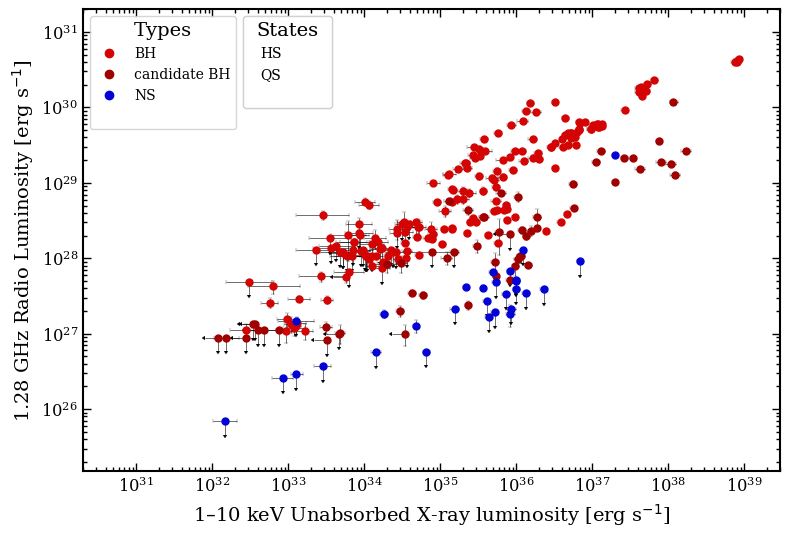

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


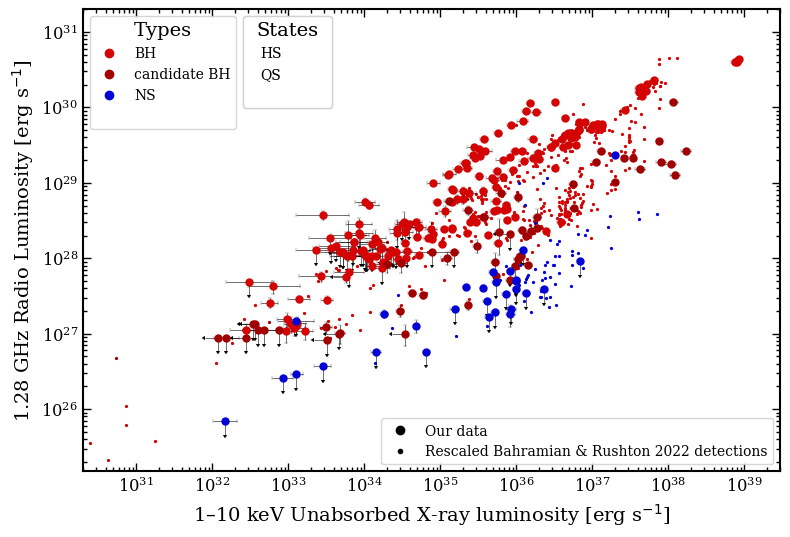

In [17]:
plot_Lr_Lx_plot2(all_data_interp, show_bahramian=False, save_name="LrLx_plane_interp_source_types")
plot_Lr_Lx_plot2(all_data_interp, save_name="LrLx_plane_interp_source_types_with_bah")

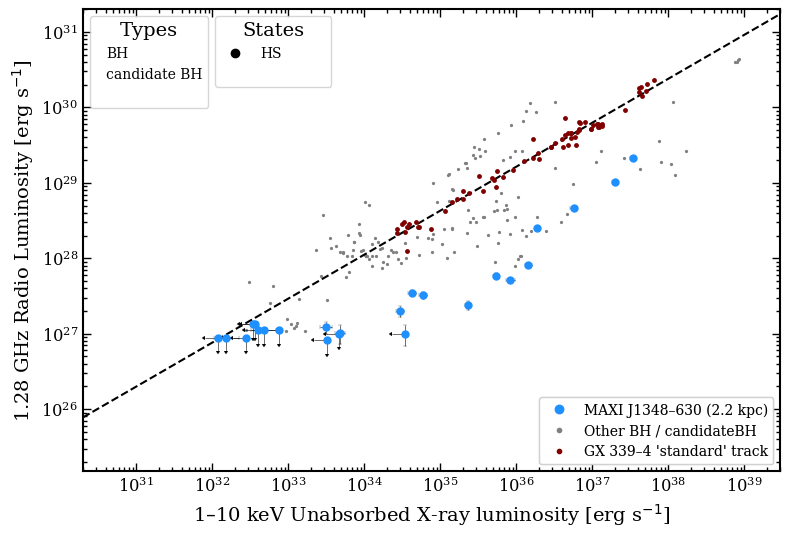

In [24]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1348-630", save_name ="LrLx_plane_interp_maxij1348", show_standard_track=True)

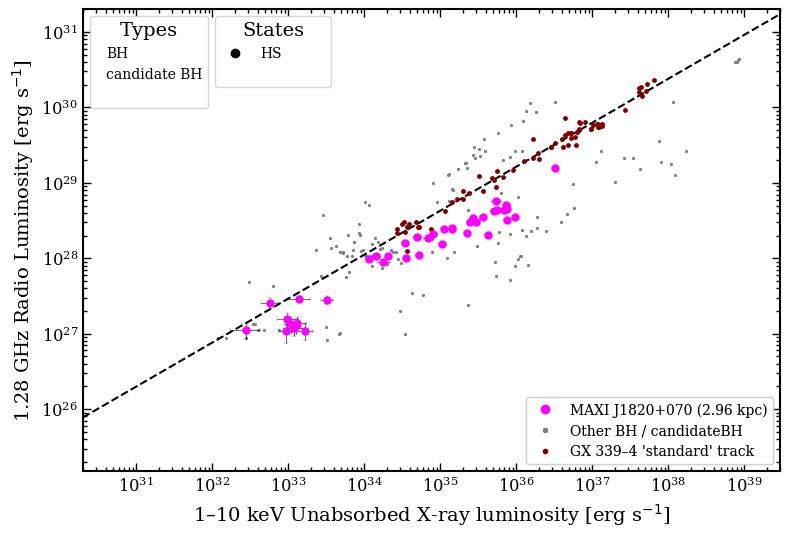

In [25]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1820+070", save_name="LrLx_plane_interp_maxij1820", show_standard_track=True)

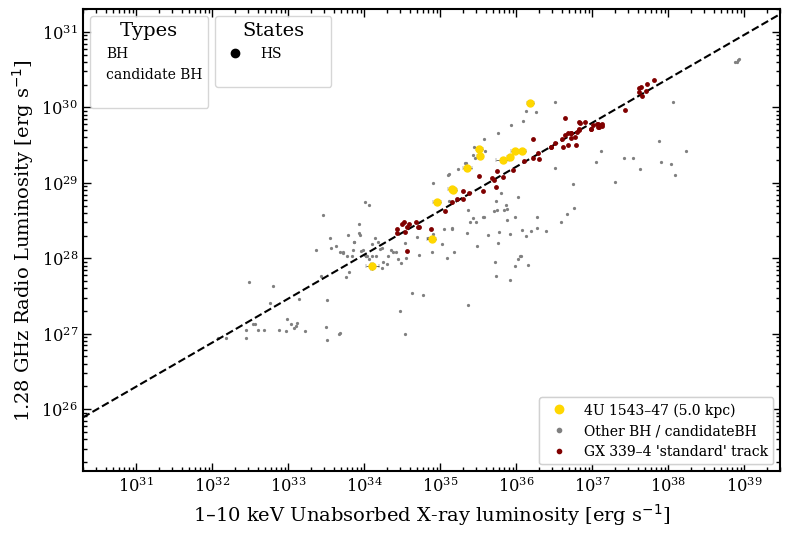

In [26]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "4U 1543-47", save_name="LrLx_plane_interp_4u1543", show_standard_track=True)

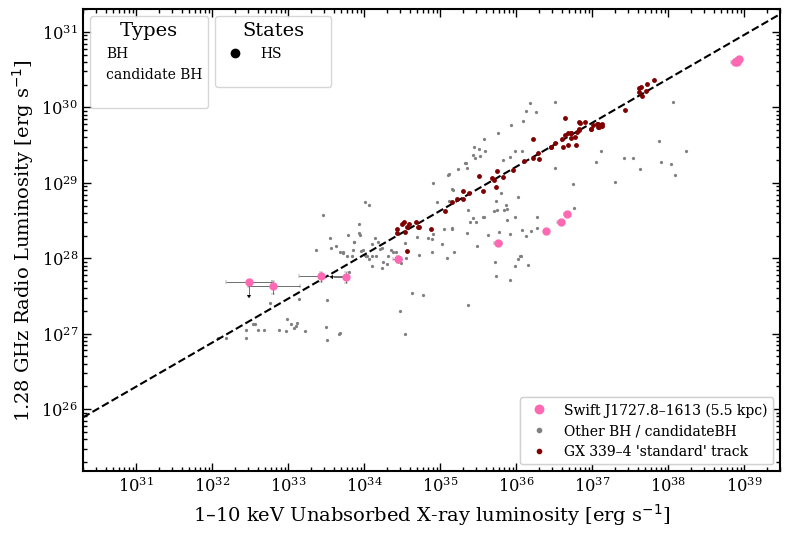

In [27]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "Swift J1727.8-1613", save_name="LrLx_plane_interp_swiftj1727", show_standard_track=True)

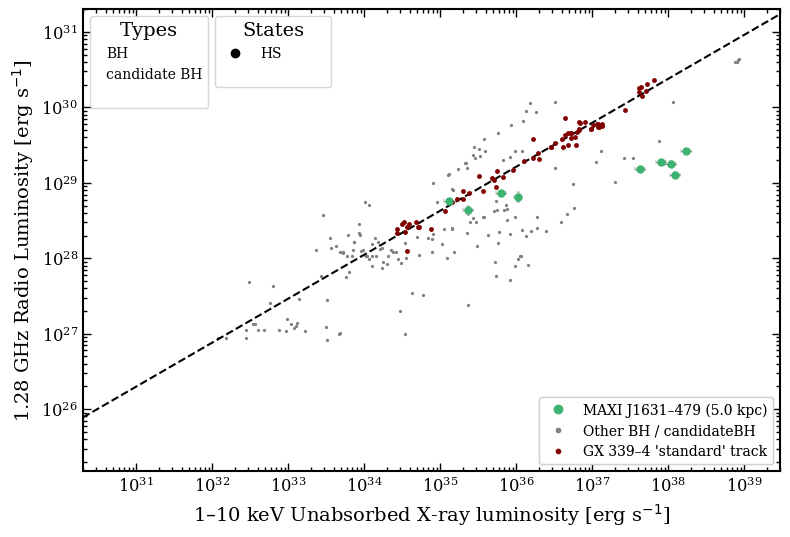

In [28]:
plot_Lr_Lx_plot3(all_data_interp, source_name= "MAXI J1631-479", save_name="LrLx_plane_interp_maxij1631", show_standard_track=True)